In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Load Data

In [9]:
df=pd.read_csv(r"Z:\226524\Datasets\USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Check Missing Values

In [10]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

Avg. Area Income - 0
Avg. Area House Age - 0
Avg. Area Number of Rooms - 0
Avg. Area Number of Bedrooms - 0
Area Population - 0
Price - 0
Address - 0


# Check price range

In [11]:
df['Price'].sort_values()

3212    1.593866e+04
1271    3.114052e+04
1799    8.859177e+04
1459    1.430274e+05
1661    1.515271e+05
            ...     
1248    2.318286e+06
924     2.330290e+06
693     2.332111e+06
2719    2.370231e+06
465     2.469066e+06
Name: Price, Length: 5000, dtype: float64

# Correlation Matrix

Since Price has highest correlation with Avg. Area Income, we consider it as the predictor for a simple linear regression

<AxesSubplot:>

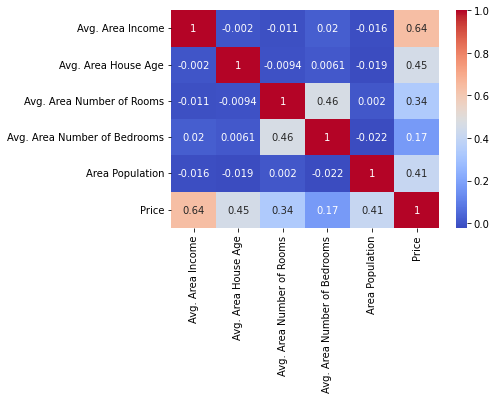

In [12]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Predictor

In [15]:
x=np.array(df['Avg. Area Income']).reshape(len(df),1)
x

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

# Dependent Variable

In [16]:
y=np.array(df['Price']).reshape(len(df),1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

# Simple Linear Regression

In [17]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
predictions=model.predict(x_test)
predictions

array([[1076061.94666682],
       [1121508.57508863],
       [1284681.50269269],
       ...,
       [1120336.32791828],
       [ 939994.32344817],
       [ 637978.56246283]])

In [20]:
y_test

array([[ 894251.06863578],
       [ 932979.36062132],
       [ 920747.91128789],
       ...,
       [1372994.2901085 ],
       [ 770770.58487572],
       [ 529282.08439209]])

# R2 value

R2 is 0.4 which means 40% of the total variation in price can be explained by the linear regression of Price on Avg. Area Income hence bad fit

In [29]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.40192637122229113

# MSE

In [34]:
mean_squared_error(y_test,predictions)

74403232769.61711

# Model 

Price=-199742.53+20.85*Avg. Area Income

In [22]:
model.intercept_  #Intercept term

array([-199742.53027351])

In [16]:
model.coef_  #Coefficients

array([[20.84623103]])

# Scatterplot of Avg. Area Income vs Price

The scatterplot clearly shows the two variables are positively correlated but the values are quite far from the regression line which increases the error resulting in a bad fit. 

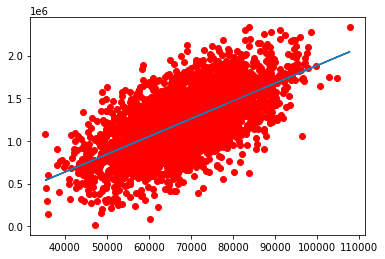

In [25]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

# Alternative Assignment2Q3a

# Load Data

In [35]:
df=pd.read_csv(r"Z:\226524\Datasets\USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Correlation Matrix

For multiple linear regression, we choose Avg. Area Income, Avg. Area House Age and Area Population as the predictors as they have the highest correlation with Price

<AxesSubplot:>

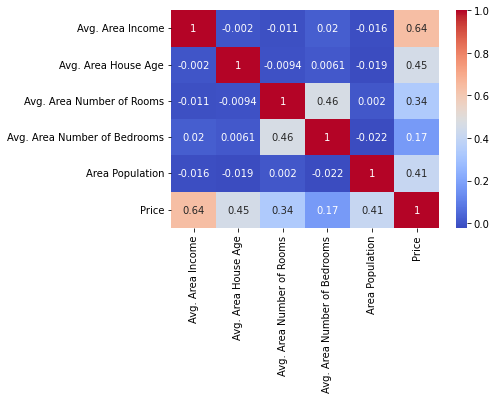

In [36]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Predictors

In [37]:
x=np.array(df[['Avg. Area Income','Avg. Area House Age','Area Population']])
x

array([[7.95454586e+04, 5.68286132e+00, 2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 4.65012838e+04]])

# Dependent Variable

In [38]:
y=np.array(df['Price']).reshape(len(df),1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

# Multiple Linear Regression

In [39]:
#divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

#random state => seed value used by random number generator

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
#Implement Classifier based on Simple Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
predictions=model.predict(x_test)
predictions

array([[1062946.24854684],
       [1077718.59886106],
       [1016845.30631233],
       ...,
       [1513364.39376411],
       [ 737171.063128  ],
       [ 645918.29196909]])

In [42]:
y_test

array([[ 894251.06863578],
       [ 932979.36062132],
       [ 920747.91128789],
       ...,
       [1372994.2901085 ],
       [ 770770.58487572],
       [ 529282.08439209]])

# R2 value

R2 is 0.79 which means 79% of the total variation in price can be explained by the linear regression of Price on Avg. Area Income, Avg. Area House Age and Area Population hence Good fit

In [43]:
r_sq = model.score(x_train,y_train)       #R2 value
r_sq

0.7933575110031879

# MSE

In [44]:
mean_squared_error(y_test,predictions)

24805029076.384342

# Model

Price=-1758162.64+2.12911588e+01*Avg. Area Income+1.63976938e+05*Avg. Area House Age+1.51683005e+01*Area Population

In [45]:
model.intercept_  #Intercept term

array([-1758162.64142081])

In [46]:
model.coef_  #Coefficients

array([[2.12911588e+01, 1.63976938e+05, 1.51683005e+01]])

# Compare R2 and MSE values

Since R2 is higher in Multiple Linear Regression and MSE is lower in Multiple Linear Regression it is the appropriate model

In [48]:
pd.DataFrame([[0.40,0.79],[74403232769.62,24805029076.38]],index=['R2','MSE'],columns=['Simple LR','Multiple LR'])

,Simple LR,Multiple LR
R2,4.000000e-01,7.900000e-01
MSE,7.440323e+10,2.480503e+10
